# **Business Case: Aerofit - Descriptive Statistics & Probability**

## **Problem Statement:**
### Identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv(r"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


***
***
### **1. Analyzing Basic Metrics.**

In [4]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 180
Number of columns: 9


In [5]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


***
***
## **2. Non-Graphical Analysis: Value Counts and Unique Attributes.**

In [7]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

There are only Three products in the dataset

In [8]:
df['Age'].value_counts().head(10)

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
Name: Age, dtype: int64

In [9]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [10]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [11]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [12]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

***
***
## **3. Missing Value & Outlier Detection.**

In [13]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There are no missing values in the dataset

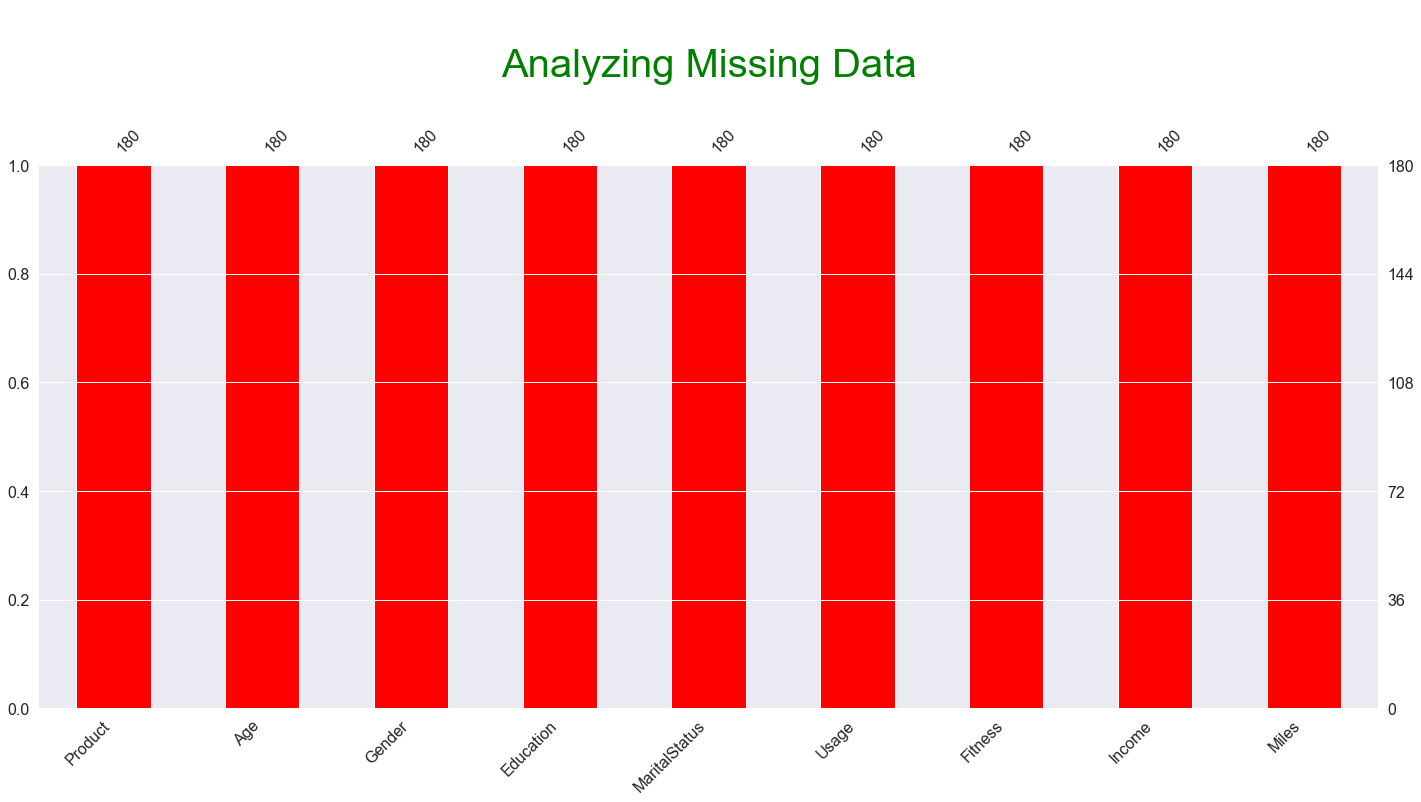

In [14]:
msno.bar(df, color='red')
plt.title("\nAnalyzing Missing Data\n", fontsize=40, color="green")
plt.show()

In [15]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [16]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


### Detecting Outlier

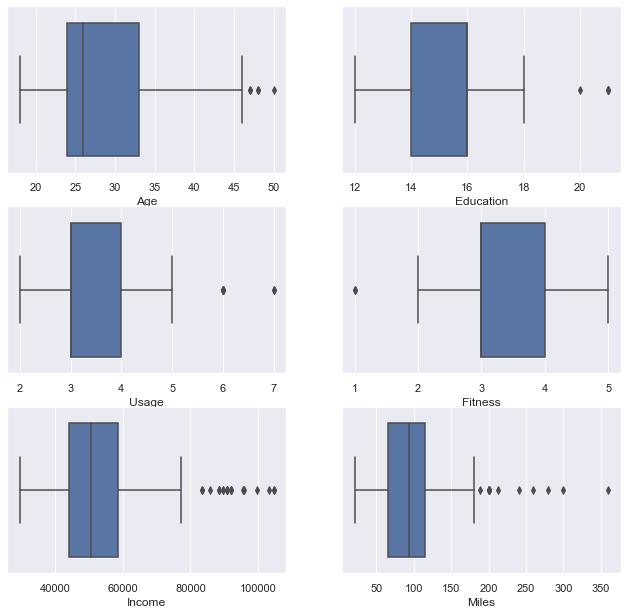

In [17]:
fig, axis =plt.subplots(nrows=3 ,ncols=2 , figsize =(11,9))
fig.subplots_adjust(top=1)

sns.boxplot(data=df ,x='Age',orient='h',ax=axis[0,0])
sns.boxplot(data=df ,x='Education',orient='h',ax=axis[0,1])
sns.boxplot(data=df ,x='Usage',orient='h',ax=axis[1,0])
sns.boxplot(data=df ,x='Fitness',orient='h',ax=axis[1,1])
sns.boxplot(data=df ,x='Income',orient='h',ax=axis[2,0])
sns.boxplot(data=df ,x='Miles',orient='h',ax=axis[2,1])
plt.show()

From the above boxplot we can observe that

**1** **Age**,**Education** and **Usgae** are having few outliers

**2** **Income** and **Miles** are having more outliers

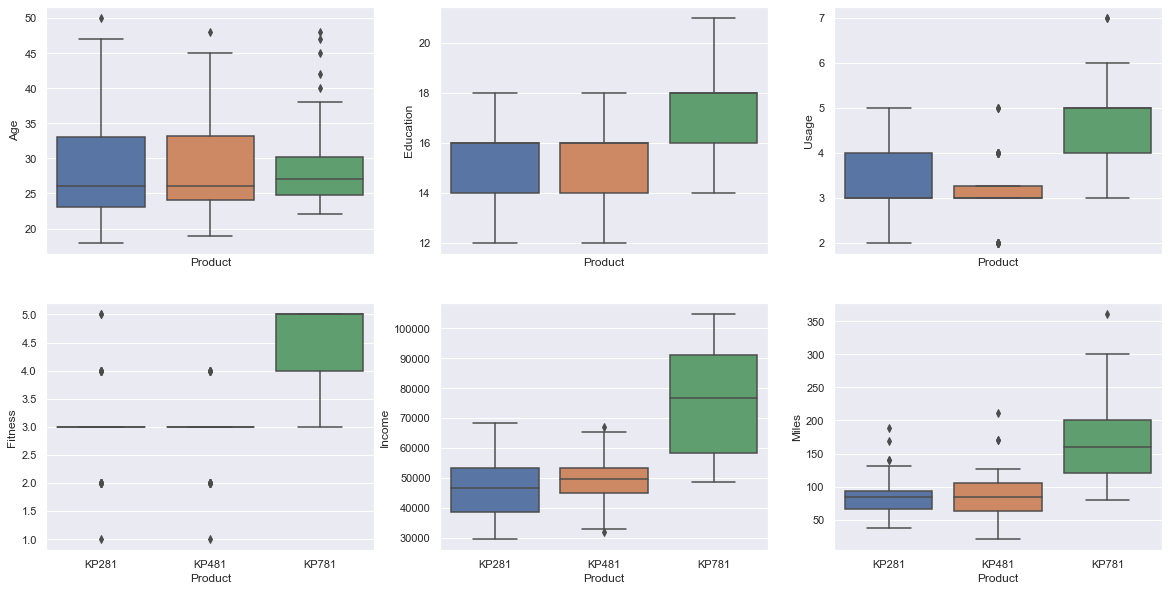

In [18]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(20,10))
for col, x, y in [['Age', 0, 0], ['Education', 0, 1], ['Usage', 0, 2], ['Fitness', 1, 0], ['Income', 1, 1], ['Miles', 1, 2]]:
    sns.boxplot(data=df, y=col, ax=axes[x, y], x='Product')   
plt.show()

1. Product vs Age
        > Customers whose age lies between 25-30, are more likely to buy KP781 product
        
2. Product vs Education
        > Customers whose eduation is more then 16 are more likely to go for the top model (KP781)
        
3. Product vs Fitness
        > The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.
        
4. Product vs Income
        > Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the high end  KP781 product.
        
#### Univariate Analysis
Understanding the distubution of data for the quantitative attribute:  
- 1.Age
- 2.Education
- 3.Usage
- 4.Fitness
- 5.Income
- 6.miles        

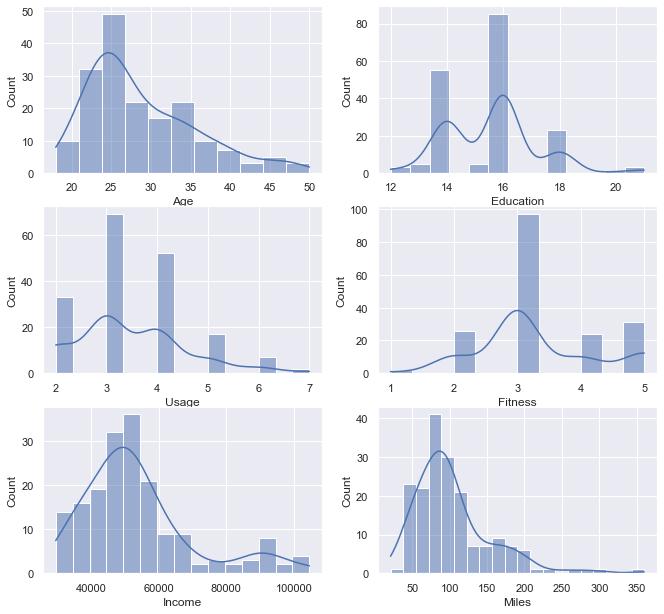

In [19]:
fig, axis =plt.subplots(nrows=3 ,ncols=2 , figsize =(11,9))
fig.subplots_adjust(top=1)

sns.histplot(data=df,x='Age',kde=True,ax=axis[0,0])
sns.histplot(data=df,x='Education',kde=True,ax=axis[0,1])
sns.histplot(data=df,x='Usage',kde=True,ax=axis[1,0])
sns.histplot(data=df,x='Fitness',kde=True,ax=axis[1,1])
sns.histplot(data=df,x='Income',kde=True,ax=axis[2,0])
sns.histplot(data=df,x='Miles',kde=True,ax=axis[2,1])
plt.show()

Categorical variable Uni-variante Analysis

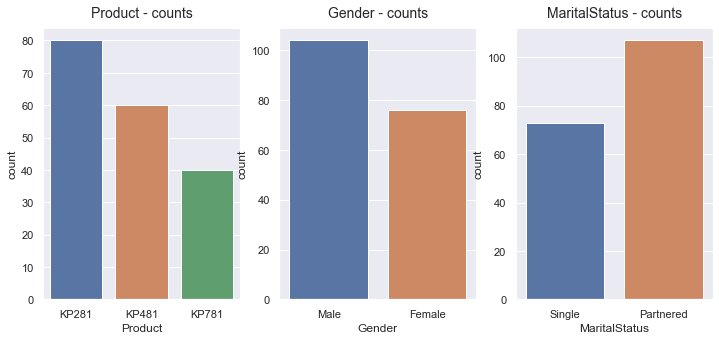

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

In [21]:
df1=df[['Product','Gender','MaritalStatus']].melt()
df1.groupby(['variable','value'])[['value']].count()/len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

#### **Obervation**

**Product**

   **44.44%** of the customers have purchased **KP2821** product.
   
   **33.33%** of the customers have purchased **KP481** product.
   
   **22.22%** of the customers have purchased **KP781** product.
   
**Gender**

The percentage of male is more the female

## Bivariate Analysis

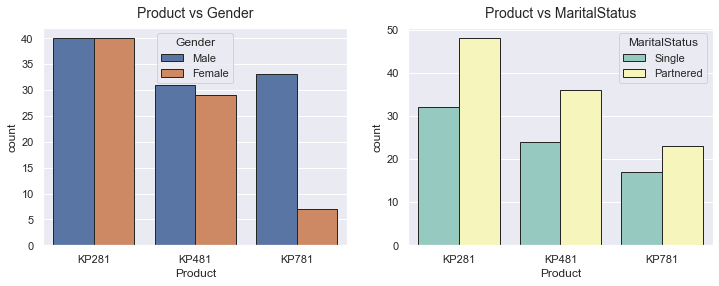

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15",  ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

For Product vs Gender

Equal number of product KP281 is purchased by male and female and the ratio is also same for the product KP481

For the product KP781 the ratio of male buyer is more then female

For Product vs MaritalStatus

The partnered is more likely to buy the product

***
***
## **4. Visual Analysis - Univariate & Bivariate.**

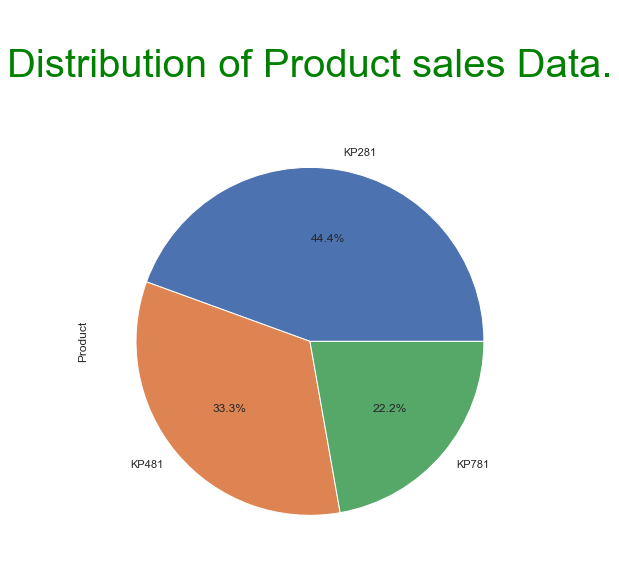

In [23]:
plt.figure(figsize=(14,7))
df['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("\nDistribution of Product sales Data.\n", fontsize=40, color="green")
plt.show()

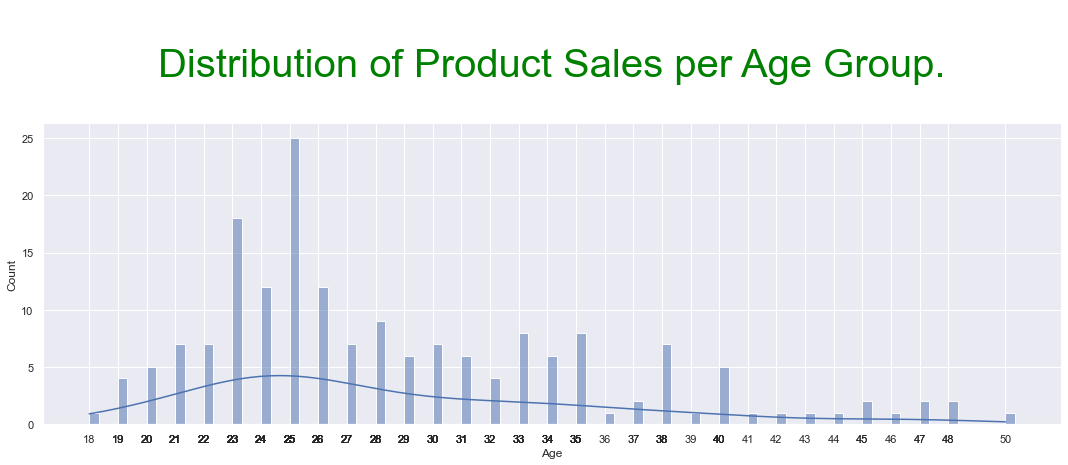

In [24]:
ax = sns.displot(data=df, x='Age', aspect=3, kde=True, binwidth=1/3, palette="Set1")
ax.set(xticks=df['Age'])
plt.title("\nDistribution of Product Sales per Age Group.\n", fontsize=40, color="green")
plt.show()

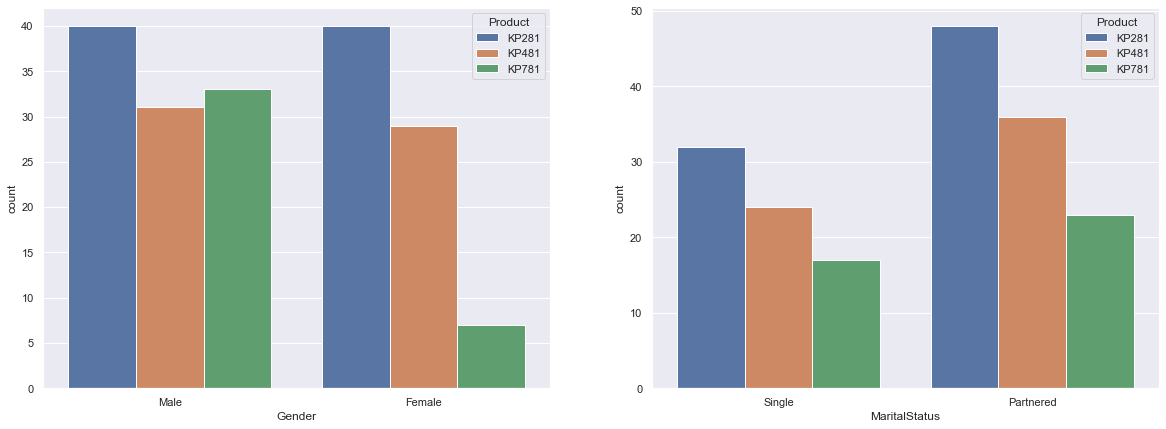

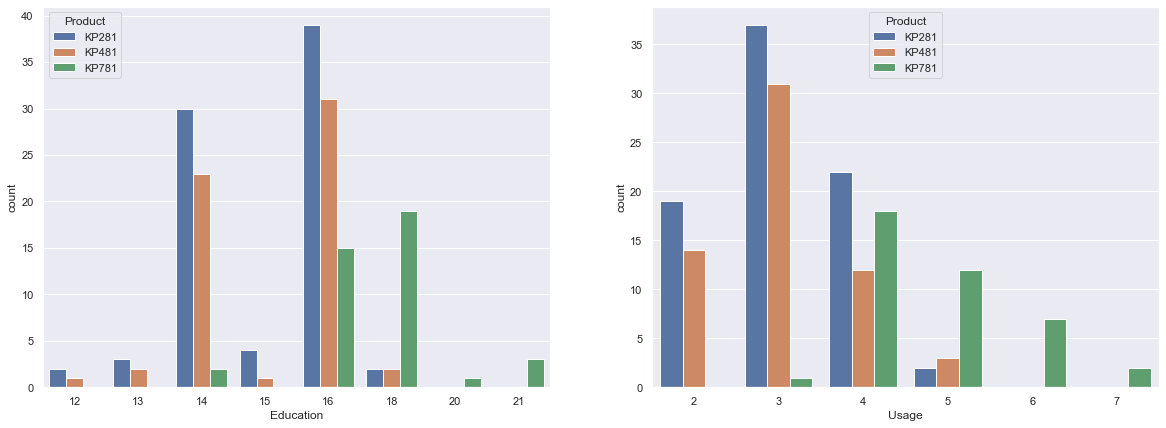

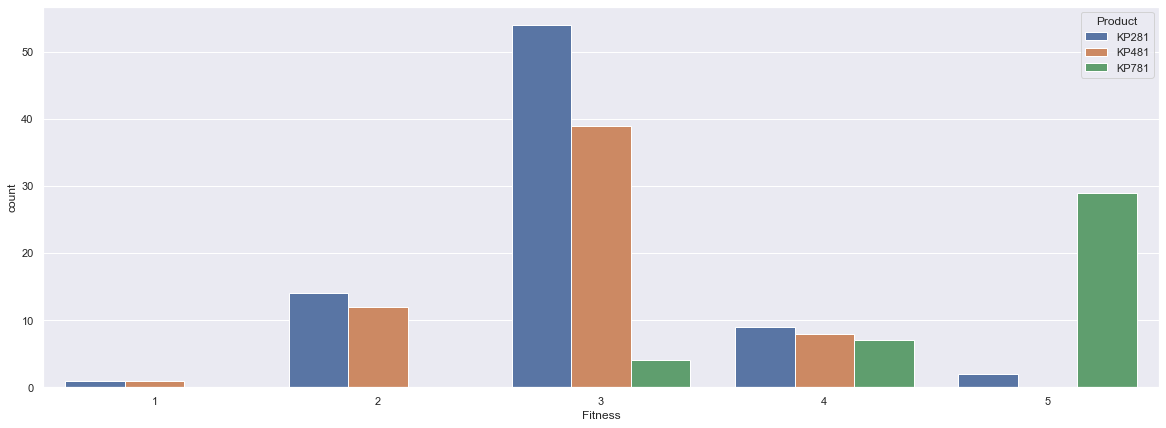

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))
for col, x in [['Gender', 0], ['MaritalStatus', 1]]:
    sns.countplot(data=df, x=col, hue='Product', ax=axes[x])
plt.show()
fig, axes = plt.subplots(1, 2, figsize=(20,7))
for col, x in [['Education', 0], ['Usage', 1]]:
    sns.countplot(data=df, x=col, hue='Product', ax=axes[x])
plt.show()
fig, axes = plt.subplots(1, 1, figsize=(20,7))
sns.countplot(data=df, x='Fitness', hue='Product', ax=axes)
plt.show()

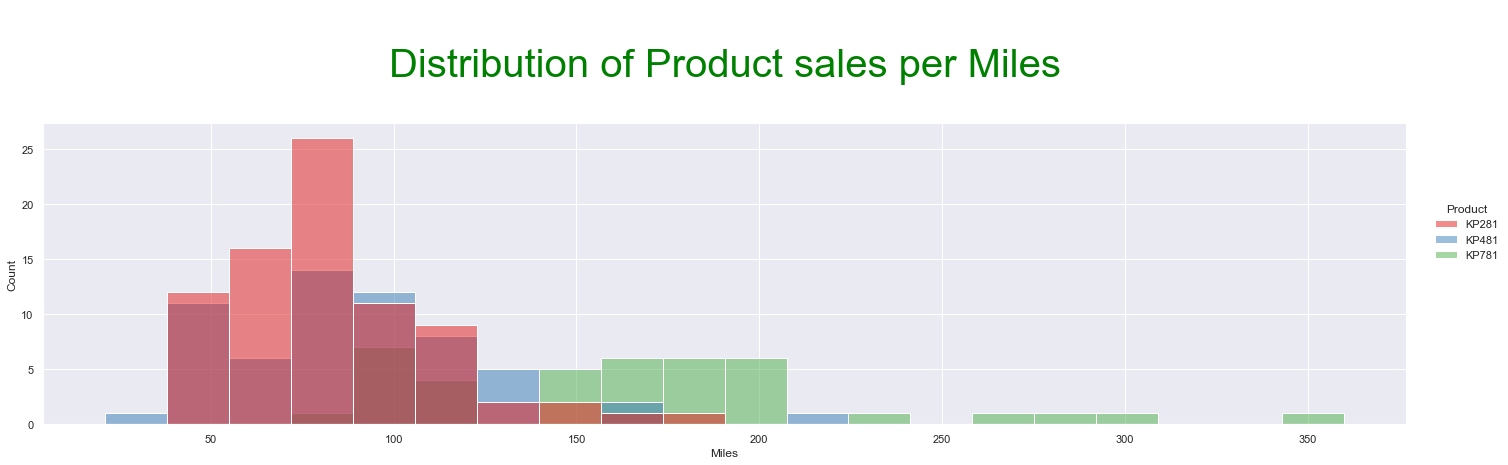

In [26]:
sns.displot(data=df, x='Miles', aspect=4, hue='Product', palette="Set1")
plt.title("\nDistribution of Product sales per Miles\n", fontsize=40, color="green")
plt.show()

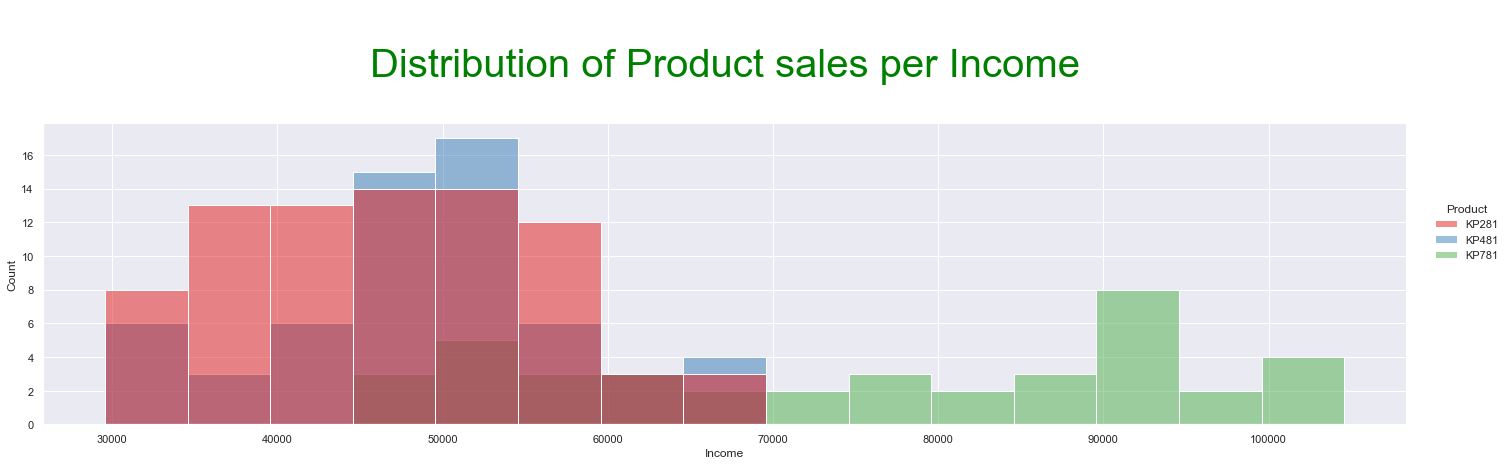

In [27]:
sns.displot(data=df, x='Income', aspect=4, hue='Product', palette="Set1")
plt.title("\nDistribution of Product sales per Income\n", fontsize=40, color="green")
plt.show()

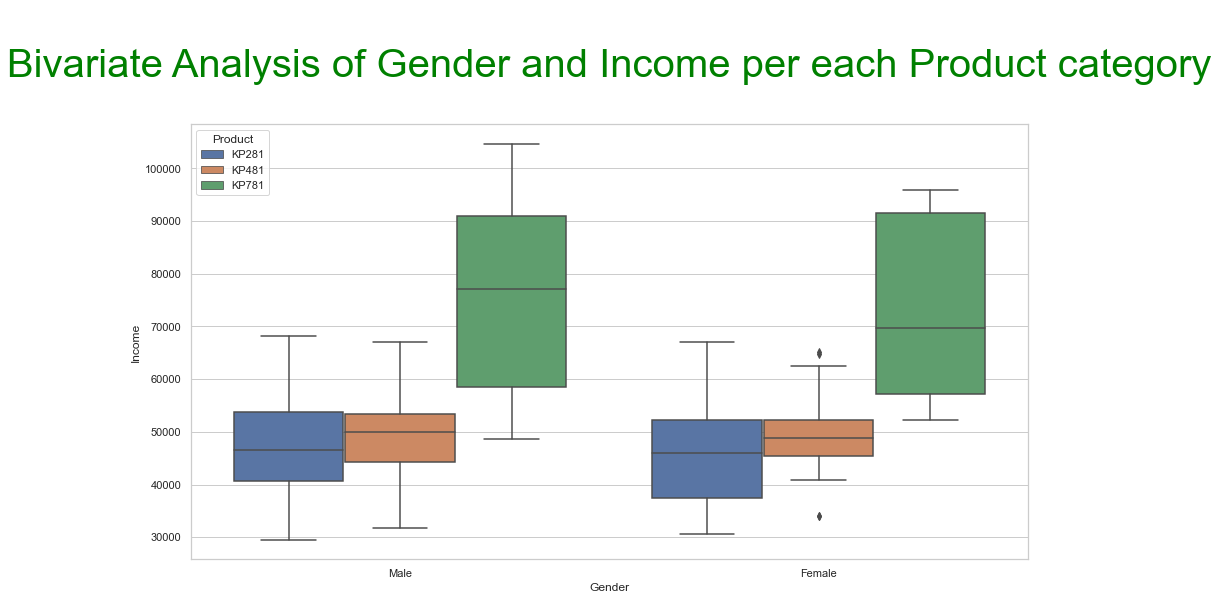

In [28]:
plt.figure(figsize = (15,8))
sns.set_style("whitegrid")
sns.boxplot(x = 'Gender', y = 'Income', data = df, hue= 'Product')
plt.title("\nBivariate Analysis of Gender and Income per each Product category\n", fontsize=40, color="green")
plt.show()

***
***
## **5. Convert data to Numerical Categories.**

In [29]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if str(x)=='Male' else 0)
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x: 1 if str(x)=='Partnered' else 0)
df['AgeCategory'] = df['Age'].apply(lambda x: int((int(x)-18)/4))
df['MilesCategory'] = df['Miles'].apply(lambda x: int(float(x)/50))
df['IncomeCategory'] = df['Income'].apply(lambda x: int((int(x)-30000)/5000))
df.drop(['Age', 'Miles', 'Income'], axis=1, inplace=True)
df.head()

,Product,Gender,Education,MaritalStatus,Usage,Fitness,AgeCategory,MilesCategory,IncomeCategory
0,KP281,1,14,0,3,4,0,2,0
1,KP281,1,15,0,2,3,0,1,0
2,KP281,0,14,1,4,3,0,1,0
3,KP281,1,12,0,3,3,0,1,0
4,KP281,1,13,1,4,2,0,0,1


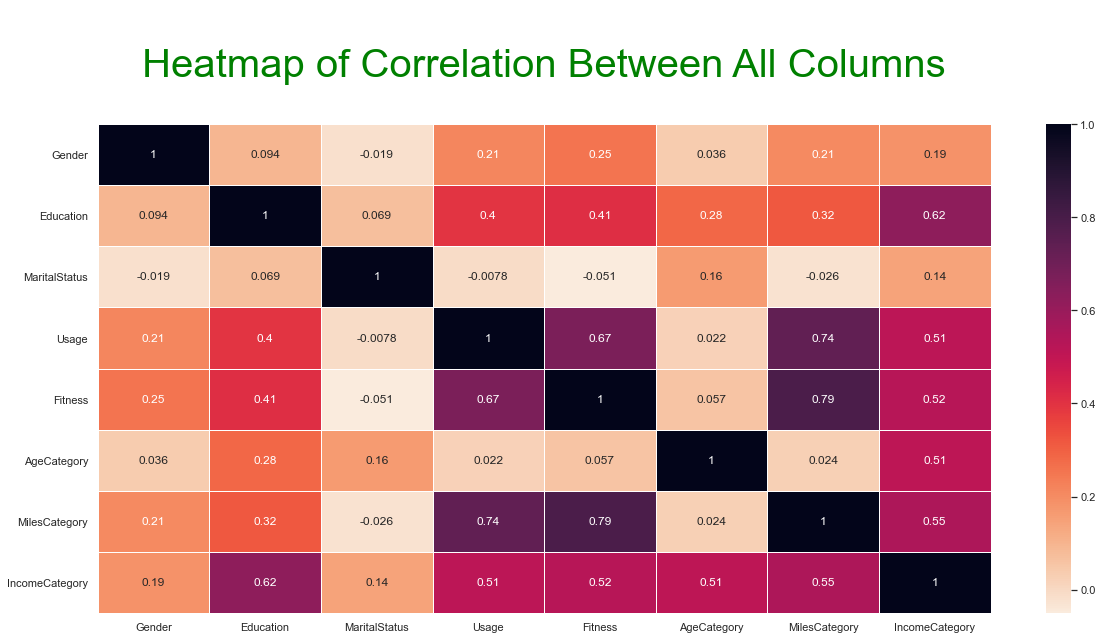

In [30]:
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(df.corr(), linewidths=.5, cmap=sns.cm.rocket_r, annot=True, ax=ax)
plt.title("\nHeatmap of Correlation Between All Columns\n", fontsize=40, color="green")
plt.show()

***
***
## **6. Conditional Probabilities of All Columns per each Product Category.**

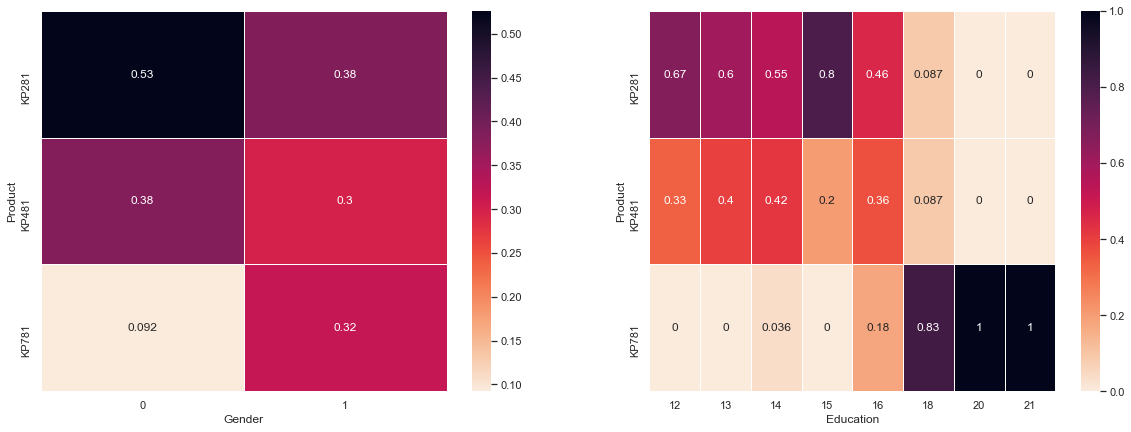

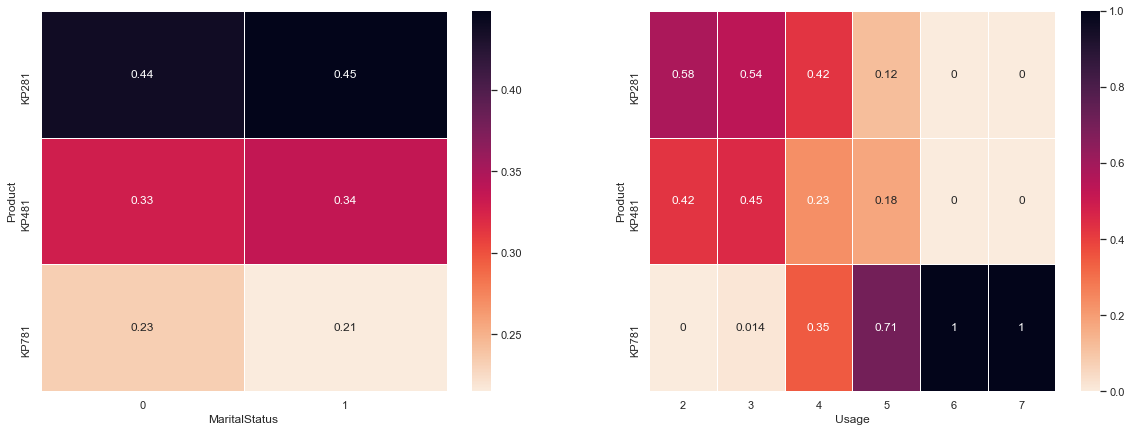

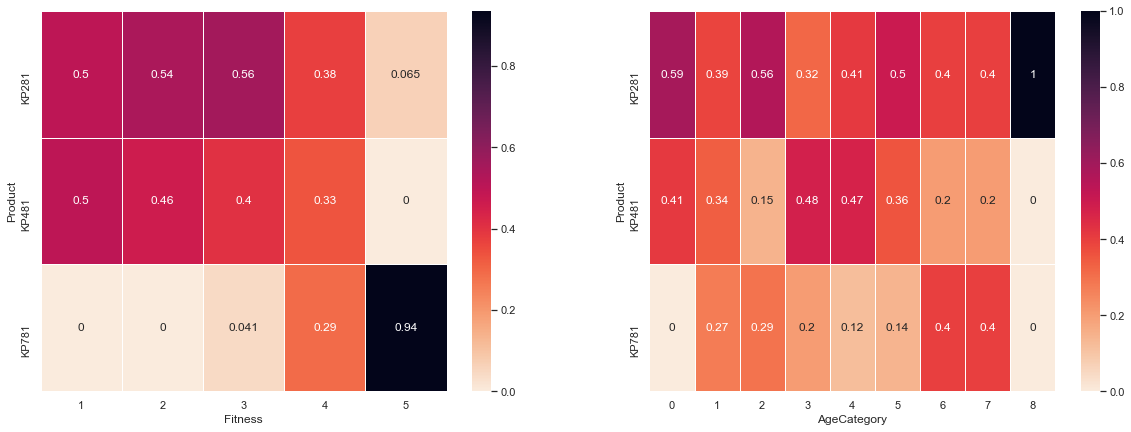

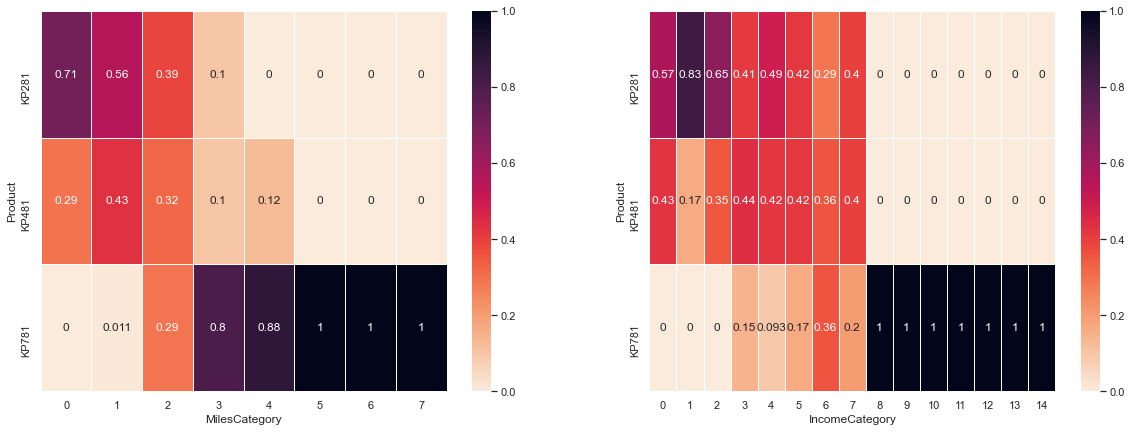

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
for i in range(1, len(df.columns)):
    y = (i-1)%2
    sns.heatmap(pd.crosstab(df.Product, df[df.columns[i]], normalize='columns'), linewidths=.5, cmap=sns.cm.rocket_r, annot=True, ax=ax[y])
    if y == 1:
        plt.show()
        if i < len(df.columns)-1:
            fig, ax = plt.subplots(1, 2, figsize=(20,7))


***
***
## **7. Business Insights.**
#### **A.** People with higher income prefer to buy KP781 over the other products.
#### **B.** People with lower and middle income prefer to buy KP281 and KP481 over the other products.
#### **C.** People with higher fitness levels prefer to buy KP781 over the other products.
#### **D.** People with lower and middle fitness levels prefer to buy KP281 and KP481 over the other products.
#### **E.** People who expect extensive use of the product prefer to buy KP781 over the other products.
#### **F.** People who expect less extensive use of the product prefer to buy KP281 and KP481 over the other products.
#### **G.** Marital Status seems to have no apparent effect over individual preferences to buy different products.
#### **H.** Males prefer to buy KP781 significantly more than Women. 
#### **I.** Female prefer to buy KP281 and KP481 significantly more than Men.
#### **J.** People with higher education prefer to buy KP781 over the other products.
#### **K.** People with lower and middle education prefer to buy KP281 and KP481 over the other products.
#### **L.** Individuals with Age between 20-30 are more likely to buy any of the products than other Age groups.

***
***
## **8. Recommendations**
#### **A.** Aerofit should target selling KP781 product to the men with higher fitness levels, higher income and higher education.
#### **B.** Aerofit should target selling KP281 and KP481 products to the individuals with average or below average fitness levels, income and education.
#### **C.** Aerofit should target selling KP781 product to the people who are expecting more extensive usage of the product.
#### **D.** Aerofit should target selling KP281, KP481 products to the people who are expecting less extensive usage of the product.
#### **E.** Aerofit should target selling products to the people who are aged between 20-30 years, more than other age groups. Targeted advertisements should be used for the same.